In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq
from scipy import stats
import numpy as np
import scipy.stats as st
import os # OS library

In [2]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq
from scipy import stats
import numpy as np
import scipy.stats as st

In [59]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/Spec_New_UV_test_5.8.23/*.txt')

def GET_DATA(name):
    df = pd.read_csv(name, skiprows=15, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(189,881,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

files

['../../../CDOM_DATA/PATHLENGTH_DATA/Spec_New_UV_test_5.8.23\\New_UV_FLMS126231_001.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_New_UV_test_5.8.23\\New_UV_FLMS126231_002.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_New_UV_test_5.8.23\\New_UV_FLMS126231_003.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_New_UV_test_5.8.23\\New_UV_FLMS126231_004.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_New_UV_test_5.8.23\\New_UV_FLMS126231_005.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_New_UV_test_5.8.23\\New_UV_FLMS126231_006.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_New_UV_test_5.8.23\\New_UV_FLMS126231_007.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_New_UV_test_5.8.23\\New_UV_FLMS126231_008.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_New_UV_test_5.8.23\\New_UV_FLMS126231_009.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_New_UV_test_5.8.23\\New_UV_FLMS126231_010.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_New_UV_test_5.8.23\\New_UV_FLMS126231_011.txt',
 '../../..

In [60]:
frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = os.path.basename(f)[:-4].split("_")
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    ID = ID[3]
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 

df_raw_UV = df.drop(190)

df['wl'] = df.index

df = df.T

df = df.drop('wl')

df = df.add_prefix('acdom')

dfl = df.sort_index(axis=0)

dfl['minets'] = dfl.index

dfl

wl,acdom189,acdom190,acdom191,acdom192,acdom193,acdom194,acdom195,acdom196,acdom197,acdom198,...,acdom872,acdom873,acdom874,acdom875,acdom876,acdom877,acdom878,acdom879,acdom880,minets
001,133.693590,14.814358,-118.858925,-117.810785,-124.699996,41.663137,98.576122,58.728908,98.176175,262.645371,...,428.588414,362.874351,404.304386,370.300504,447.840362,472.315788,383.943013,439.773796,422.862618,001
002,-42.877356,-90.839928,-106.129586,1.423680,-25.352125,16.419967,6.260734,62.841941,135.411577,202.797610,...,404.184295,402.074521,387.267225,413.009414,406.823354,386.363517,438.877322,355.305715,382.498204,002
003,411.311380,15.437237,-72.778586,-66.196551,-69.574131,-18.712584,7.355083,14.446026,189.040161,241.936502,...,456.225080,381.550274,393.842801,413.916264,445.219022,389.127180,431.051255,405.157005,374.820720,003
004,-168.728514,-42.444619,-96.783912,-131.256487,-22.288510,5.309280,31.978960,63.416353,158.828972,220.930265,...,373.780411,339.165727,374.368862,390.574555,410.092188,341.174612,460.163614,382.168785,415.105392,004
005,184.120708,-3.982598,-101.595519,-64.943143,-45.815043,-14.160726,1.367875,63.314208,151.638882,221.406631,...,394.352386,438.469687,393.507028,430.274833,366.920984,450.576180,392.841721,371.452371,417.824245,005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,-114.699215,-78.479039,-102.489208,-110.570275,-19.187129,14.948598,63.408964,85.933901,159.412690,205.807273,...,398.415726,344.618088,365.631033,415.487220,448.919421,405.967162,483.874128,411.831803,422.052111,372
373,-131.945906,-51.692105,-98.493095,-99.414723,-69.656417,36.059612,-28.434131,128.245401,83.729144,175.816292,...,436.968838,432.147493,439.790597,376.683711,459.019697,396.719206,367.128264,409.460358,480.931287,373
374,2125.464535,19.388888,-18.669104,-158.141825,-115.418969,-42.126612,82.293012,94.514192,116.107787,185.267454,...,480.174449,374.760173,349.036853,415.358339,471.518636,443.770444,464.626530,415.944491,404.942793,374
375,749.575201,-60.470370,-77.702708,-67.061682,-65.318772,-29.285923,85.776824,84.447298,127.218572,246.688193,...,468.721650,424.137962,361.684180,381.961648,410.748561,417.385581,467.711624,387.031371,351.105966,375


In [61]:
df_raw_UV

,001,002,003,004,005,006,007,008,009,010,...,367,368,369,370,371,372,373,374,375,376
wl,,,,,,,,,,,,,,,,,,,,,
189,133.693590,-42.877356,411.311380,-168.728514,184.120708,-196.340291,1440.333297,-185.043269,-56.995647,1675.356001,...,-495.497491,396.634755,-334.996093,851.966520,-48.693177,-114.699215,-131.945906,2125.464535,749.575201,114.540836
191,-118.858925,-106.129586,-72.778586,-96.783912,-101.595519,-111.009669,-50.541488,-1.438000,-74.817550,-94.657850,...,-147.912025,-99.850615,-95.058234,-81.080750,-101.791350,-102.489208,-98.493095,-18.669104,-77.702708,-156.389627
192,-117.810785,1.423680,-66.196551,-131.256487,-64.943143,-99.805015,-20.270146,-82.846577,-65.514425,-123.841522,...,-118.871883,-52.482802,-114.812114,-90.606500,-62.554878,-110.570275,-99.414723,-158.141825,-67.061682,-142.669889
193,-124.699996,-25.352125,-69.574131,-22.288510,-45.815043,-81.215939,-87.059402,-33.113105,-67.447151,-50.479730,...,9.032098,-41.159409,-47.121355,-71.735384,-50.314842,-19.187129,-69.656417,-115.418969,-65.318772,-49.666582
194,41.663137,16.419967,-18.712584,5.309280,-14.160726,-43.308928,0.577941,-87.572529,-11.363697,-13.208900,...,-27.566229,-2.596084,3.807238,3.600056,-22.896416,14.948598,36.059612,-42.126612,-29.285923,0.907857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,447.840362,406.823354,445.219022,410.092188,366.920984,337.465106,467.877250,416.060311,367.621412,380.549387,...,469.920931,447.257023,455.991690,450.187270,462.195037,448.919421,459.019697,471.518636,410.748561,460.937627
877,472.315788,386.363517,389.127180,341.174612,450.576180,417.996524,410.039043,420.461054,430.902317,428.385349,...,488.525926,369.573315,375.561549,430.327856,368.694626,405.967162,396.719206,443.770444,417.385581,433.531091
878,383.943013,438.877322,431.051255,460.163614,392.841721,371.643465,410.775119,359.124696,443.547078,433.730733,...,463.366049,458.135855,472.899719,460.249526,369.323073,483.874128,367.128264,464.626530,467.711624,433.344036


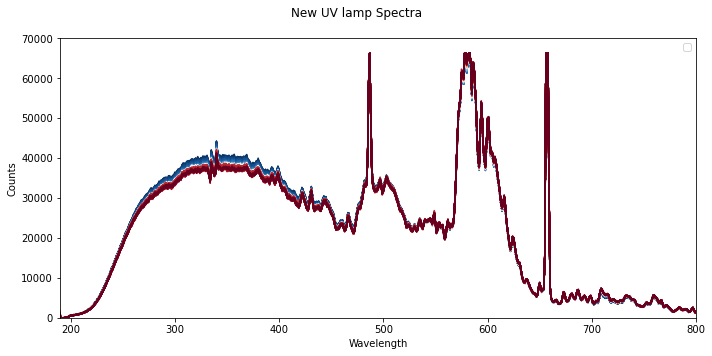

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a colormap that goes from red to blue
cmap = plt.cm.get_cmap('RdBu_r')

# Create a figure and set the size
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data using a loop to set the color of each line
for i, col in enumerate(df_raw_UV.columns):
    color = cmap(i / (len(df_raw_UV.columns) - 1))  # Calculate the color based on the current line
    df_raw_UV[col].plot(ax=ax, color=color, label=col)

# Set the x and y limits, and the axis labels
ax.set_xlim(190, 800)
ax.set_ylim(0, 70000)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Counts')

# Add a title and legend
fig.suptitle('New UV lamp Spectra')
ax.legend("")

# Show the plot
plt.tight_layout()
fig.set_facecolor('w')

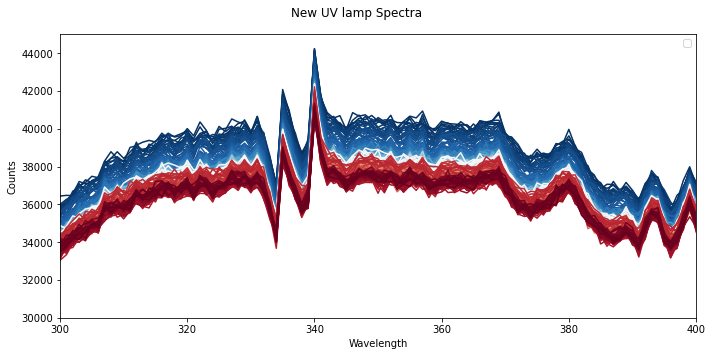

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a colormap that goes from red to blue
cmap = plt.cm.get_cmap('RdBu_r')

# Create a figure and set the size
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data using a loop to set the color of each line
for i, col in enumerate(df_raw_UV.columns):
    color = cmap(i / (len(df_raw_UV.columns) - 1))  # Calculate the color based on the current line
    df_raw_UV[col].plot(ax=ax, color=color, label=col)

# Set the x and y limits, and the axis labels
ax.set_xlim(300, 400)
ax.set_ylim(30000, 45000)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Counts')

# Add a title and legend
fig.suptitle('New UV lamp Spectra')
ax.legend("")

# Show the plot
plt.tight_layout()
fig.set_facecolor('w')

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = os.path.basename(f)[:-4].split("_")
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    ID = list(filter(None, ID))
    hour, minute, second, milisec = ID[4].split('-')
    total_minutes = (int(hour) * 60) + int(minute) + (int(second) / 60) + (int(second) / (60*60)) - 738
    ID = total_minutes
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index

df = df.T

df = df.drop('wl')

df = df.add_prefix('acdom')

dfl = df.sort_index(axis=0)

dfl['minets'] = dfl.index

dfl

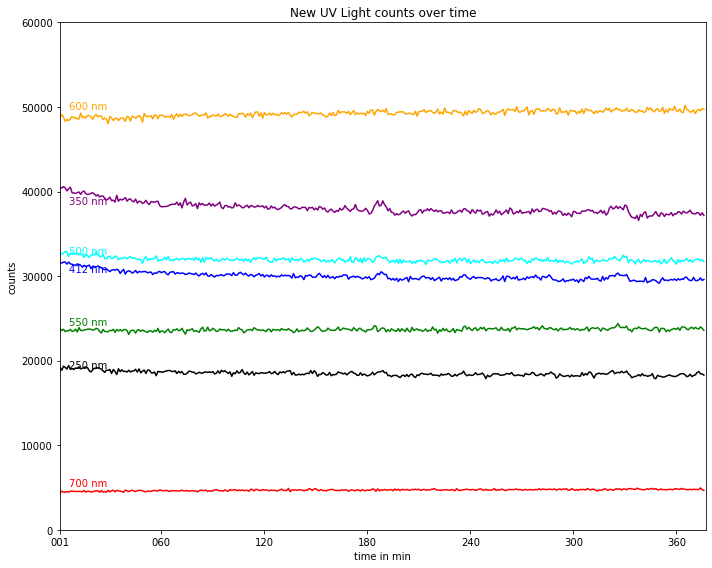

In [64]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 

minets = dfl['minets']

acdom250 = dfl['acdom250']
acdom350 = dfl['acdom350']
acdom412 = dfl['acdom412']
acdom500 = dfl['acdom500']
acdom550 = dfl['acdom550']
acdom600 = dfl['acdom600']
acdom700 = dfl['acdom700']

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(minets, acdom250, c='black')
ax.plot(minets, acdom350, c='purple')
ax.plot(minets, acdom412, c='blue')
ax.plot(minets, acdom500, c='cyan')
ax.plot(minets, acdom550, c='green')
ax.plot(minets, acdom600, c='orange')
ax.plot(minets, acdom700, c='red')

ax.set_xlim(0,376)
ax.set_ylim(0,60000)

ax.text(5,acdom250.mean()+600,"250 nm", fontsize=10, ha='left', c="black")
ax.text(5,acdom350.mean()+500,"350 nm", fontsize=10, ha='left', c="purple")
ax.text(5,acdom412.mean()+400,"412 nm", fontsize=10, ha='left', c="blue")
ax.text(5,acdom500.mean()+600,"500 nm", fontsize=10, ha='left', c="cyan")
ax.text(5,acdom550.mean()+500,"550 nm", fontsize=10, ha='left', c="green")
ax.text(5,acdom600.mean()+500,"600 nm", fontsize=10, ha='left', c="orange")
ax.text(5,acdom700.mean()+500,"700 nm", fontsize=10, ha='left', c="red")

minets_selected = np.take(minets, [0, 59, 119, 179, 239, 299, 359])
ax.set_xticks(minets_selected)

ax.set_xlabel("time in min")
ax.set_ylabel("counts")
ax.set_title("New UV Light counts over time")

plt.tight_layout()
fig.set_facecolor('w')

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/New_UV_light_over_time.png')

In [65]:
minets_s = minets[180:375]
acdom250_s = acdom250[180:375]
acdom350_s = acdom350[180:375]
acdom412_s = acdom412[180:375]
acdom500_s = acdom500[180:375]
acdom550_s = acdom550[180:375]
acdom600_s = acdom600[180:375]
acdom700_s = acdom700[180:375]

acdom250_percent_change = ((acdom250_s - acdom250_s[0])/abs(acdom250_s[0]))*100
acdom350_percent_change = ((acdom350_s - acdom350_s[0])/abs(acdom350_s[0]))*100
acdom412_percent_change = ((acdom412_s - acdom412_s[0])/abs(acdom412_s[0]))*100
acdom500_percent_change = ((acdom500_s - acdom500_s[0])/abs(acdom500_s[0]))*100
acdom550_percent_change = ((acdom550_s - acdom550_s[0])/abs(acdom550_s[0]))*100
acdom600_percent_change = ((acdom600_s - acdom600_s[0])/abs(acdom600_s[0]))*100
acdom700_percent_change = ((acdom700_s - acdom700_s[0])/abs(acdom700_s[0]))*100

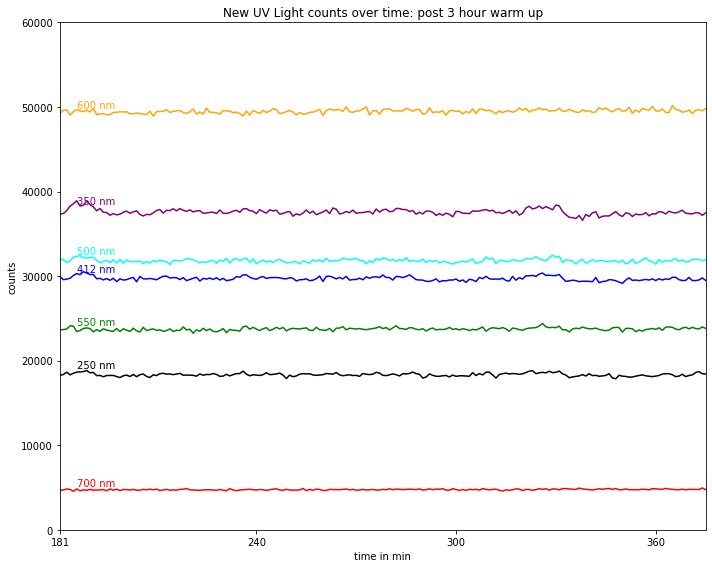

In [66]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(minets_s, acdom250_s, c='black')
ax.plot(minets_s, acdom350_s, c='purple')
ax.plot(minets_s, acdom412_s, c='blue')
ax.plot(minets_s, acdom500_s, c='cyan')
ax.plot(minets_s, acdom550_s, c='green')
ax.plot(minets_s, acdom600_s, c='orange')
ax.plot(minets_s, acdom700_s, c='red')

ax.set_xlim(0,len(minets_s)-1)
ax.set_ylim(0,60000)

ax.text(5,acdom250.mean()+600,"250 nm", fontsize=10, ha='left', c="black")
ax.text(5,acdom350.mean()+500,"350 nm", fontsize=10, ha='left', c="purple")
ax.text(5,acdom412.mean()+400,"412 nm", fontsize=10, ha='left', c="blue")
ax.text(5,acdom500.mean()+600,"500 nm", fontsize=10, ha='left', c="cyan")
ax.text(5,acdom550.mean()+500,"550 nm", fontsize=10, ha='left', c="green")
ax.text(5,acdom600.mean()+600,"600 nm", fontsize=10, ha='left', c="orange")
ax.text(5,acdom700.mean()+500,"700 nm", fontsize=10, ha='left', c="red")

minets_selected = np.take(minets_s, [0, 59, 119, 179])
ax.set_xticks(minets_selected)

ax.set_xlabel("time in min")
ax.set_ylabel("counts")
ax.set_title("New UV Light counts over time: post 3 hour warm up")

plt.tight_layout()
fig.set_facecolor('w')

plt.savefig('../../../CDOM_DATA/PATHLENGTH_DATA/Plots/New_UV_light_over_time.png')

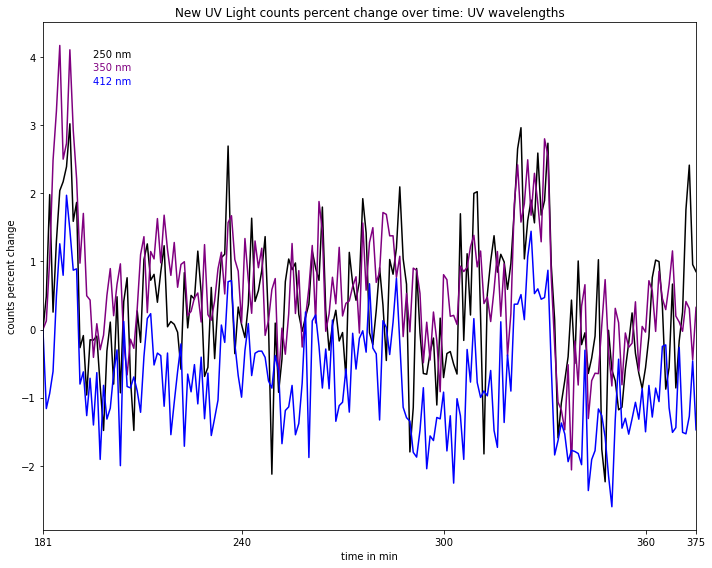

In [68]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(minets_s, acdom250_percent_change, c='black')
ax.plot(minets_s, acdom350_percent_change, c='purple')
ax.plot(minets_s, acdom412_percent_change, c='blue')
#ax.plot(minets_s, acdom500_percent_change, c='cyan')
#ax.plot(minets_s, acdom550_percent_change, c='green')
#ax.plot(minets_s, acdom600_percent_change, c='orange')
#ax.plot(minets_s, acdom700_percent_change, c='red')

ax.set_xlim(0,len(minets_s)-1)
#ax.set_ylim(15000,55000)

ax.text(15,4.0,"250 nm", fontsize=10, ha='left', c="black")
ax.text(15,3.8,"350 nm", fontsize=10, ha='left', c="purple")
ax.text(15,3.6,"412 nm", fontsize=10, ha='left', c="blue")
#ax.text(15,5.4,"500 nm", fontsize=10, ha='left', c="cyan")
#ax.text(15,5.2,"550 nm", fontsize=10, ha='left', c="green")
#ax.text(15,5.0,"600 nm", fontsize=10, ha='left', c="orange")
#ax.text(15,4.8,"700 nm", fontsize=10, ha='left', c="red")

minets_selected = np.take(minets_s, [0, 59, 119, 179, len(minets_s)-1])
ax.set_xticks(minets_selected)

ax.set_xlabel("time in min")
ax.set_ylabel("counts percent change")
ax.set_title("New UV Light counts percent change over time: UV wavelengths")

plt.tight_layout()
fig.set_facecolor('w')

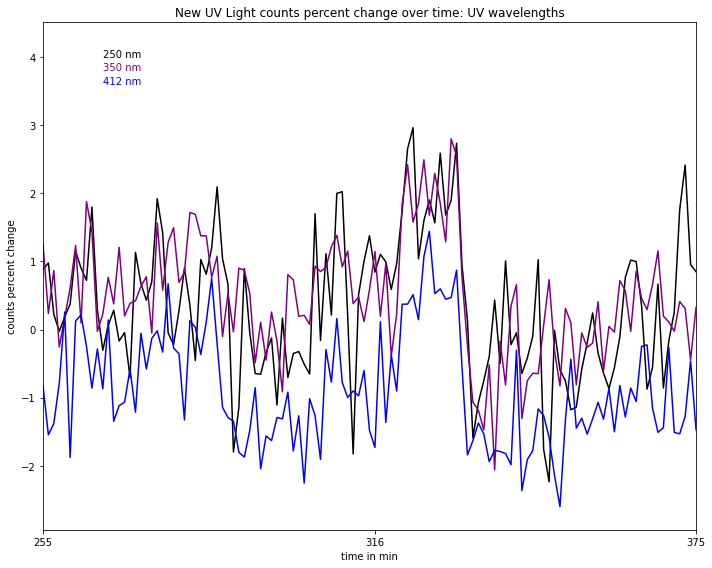

In [75]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(minets_s, acdom250_percent_change, c='black')
ax.plot(minets_s, acdom350_percent_change, c='purple')
ax.plot(minets_s, acdom412_percent_change, c='blue')
#ax.plot(minets_s, acdom500_percent_change, c='cyan')
#ax.plot(minets_s, acdom550_percent_change, c='green')
#ax.plot(minets_s, acdom600_percent_change, c='orange')
#ax.plot(minets_s, acdom700_percent_change, c='red')

ax.set_xlim(len(minets_s)-121,len(minets_s)-1)
#ax.set_ylim(15000,55000)

ax.text(len(minets_s)-110,4.0,"250 nm", fontsize=10, ha='left', c="black")
ax.text(len(minets_s)-110,3.8,"350 nm", fontsize=10, ha='left', c="purple")
ax.text(len(minets_s)-110,3.6,"412 nm", fontsize=10, ha='left', c="blue")
#ax.text(15,5.4,"500 nm", fontsize=10, ha='left', c="cyan")
#ax.text(15,5.2,"550 nm", fontsize=10, ha='left', c="green")
#ax.text(15,5.0,"600 nm", fontsize=10, ha='left', c="orange")
#ax.text(15,4.8,"700 nm", fontsize=10, ha='left', c="red")

minets_selected = np.take(minets_s, [len(minets_s)-121, len(minets_s)-60, len(minets_s)-1])
ax.set_xticks(minets_selected)

ax.set_xlabel("time in min")
ax.set_ylabel("counts percent change")
ax.set_title("New UV Light counts percent change over time: UV wavelengths")

plt.tight_layout()
fig.set_facecolor('w')

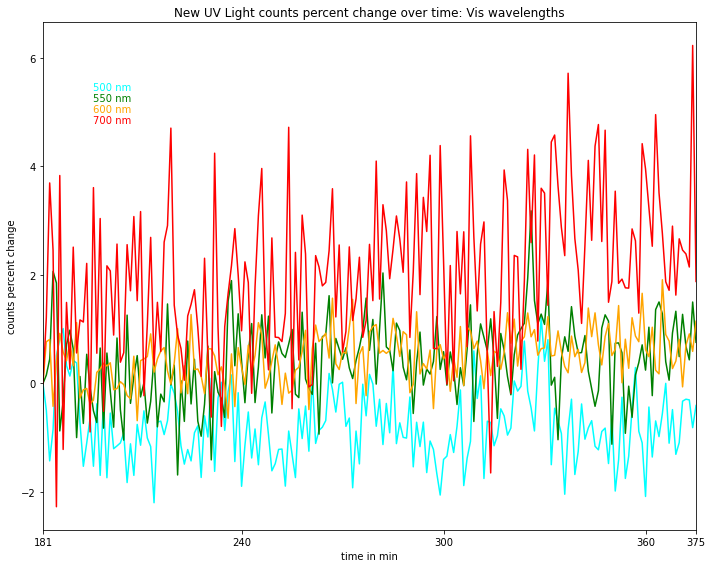

In [76]:
fig, ax = plt.subplots(figsize=(10,8))
#ax.plot(minets_s, acdom250_percent_change, c='black')
#ax.plot(minets_s, acdom350_percent_change, c='purple')
#ax.plot(minets_s, acdom412_percent_change, c='blue')
ax.plot(minets_s, acdom500_percent_change, c='cyan')
ax.plot(minets_s, acdom550_percent_change, c='green')
ax.plot(minets_s, acdom600_percent_change, c='orange')
ax.plot(minets_s, acdom700_percent_change, c='red')

ax.set_xlim(0,len(minets_s)-1)
#ax.set_ylim(15000,55000)

#ax.text(15,6.0,"250 nm", fontsize=10, ha='left', c="black")
#ax.text(15,5.8,"350 nm", fontsize=10, ha='left', c="purple")
#ax.text(15,5.6,"412 nm", fontsize=10, ha='left', c="blue")
ax.text(15,5.4,"500 nm", fontsize=10, ha='left', c="cyan")
ax.text(15,5.2,"550 nm", fontsize=10, ha='left', c="green")
ax.text(15,5.0,"600 nm", fontsize=10, ha='left', c="orange")
ax.text(15,4.8,"700 nm", fontsize=10, ha='left', c="red")

minets_selected = np.take(minets_s, [0, 59, 119, 179, len(minets_s)-1])
ax.set_xticks(minets_selected)

ax.set_xlabel("time in min")
ax.set_ylabel("counts percent change")
ax.set_title("New UV Light counts percent change over time: Vis wavelengths")

plt.tight_layout()
fig.set_facecolor('w')

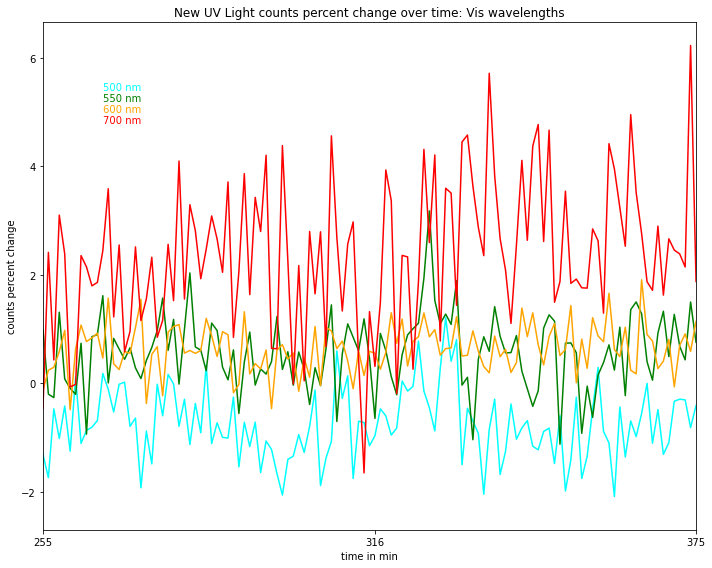

In [77]:
fig, ax = plt.subplots(figsize=(10,8))
#ax.plot(minets_s, acdom250_percent_change, c='black')
#ax.plot(minets_s, acdom350_percent_change, c='purple')
#ax.plot(minets_s, acdom412_percent_change, c='blue')
ax.plot(minets_s, acdom500_percent_change, c='cyan')
ax.plot(minets_s, acdom550_percent_change, c='green')
ax.plot(minets_s, acdom600_percent_change, c='orange')
ax.plot(minets_s, acdom700_percent_change, c='red')

ax.set_xlim(len(minets_s)-121,len(minets_s)-1)
#ax.set_ylim(15000,55000)

#ax.text(15,6.0,"250 nm", fontsize=10, ha='left', c="black")
#ax.text(15,5.8,"350 nm", fontsize=10, ha='left', c="purple")
#ax.text(15,5.6,"412 nm", fontsize=10, ha='left', c="blue")
ax.text(len(minets_s)-110,5.4,"500 nm", fontsize=10, ha='left', c="cyan")
ax.text(len(minets_s)-110,5.2,"550 nm", fontsize=10, ha='left', c="green")
ax.text(len(minets_s)-110,5.0,"600 nm", fontsize=10, ha='left', c="orange")
ax.text(len(minets_s)-110,4.8,"700 nm", fontsize=10, ha='left', c="red")

minets_selected = np.take(minets_s, [len(minets_s)-121, len(minets_s)-60, len(minets_s)-1])
ax.set_xticks(minets_selected)

ax.set_xlabel("time in min")
ax.set_ylabel("counts percent change")
ax.set_title("New UV Light counts percent change over time: Vis wavelengths")

plt.tight_layout()
fig.set_facecolor('w')

In [44]:
files = glob.glob('../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis/*UV*.txt')
files

['../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis\\UV_FLMS126231_00001.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis\\UV_FLMS126231_00002.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis\\UV_FLMS126231_00003.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis\\UV_FLMS126231_00004.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis\\UV_FLMS126231_00005.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis\\UV_FLMS126231_00006.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis\\UV_FLMS126231_00007.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis\\UV_FLMS126231_00008.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis\\UV_FLMS126231_00009.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis\\UV_FLMS126231_00010.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis\\UV_FLMS126231_00011.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis\\UV_FLMS126231_00012.txt',
 '../../../CDOM_DATA/PATHLENGTH_DATA/Spec_UV.Vis\\UV_FLMS126231_00013.txt',
 '../../../C

In [45]:
frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = os.path.basename(f)[:-4].split("_")
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    ID = ID[2]
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 

df_raw_vis = df.drop(len(df))

df['wl'] = df.index

df = df.T

df = df.drop('wl')

df = df.add_prefix('acdom')

dfd = df.sort_index(axis=0)

dfd['minets'] = dfd.index

dfd

wl,acdom189,acdom190,acdom191,acdom192,acdom193,acdom194,acdom195,acdom196,acdom197,acdom198,...,acdom872,acdom873,acdom874,acdom875,acdom876,acdom877,acdom878,acdom879,acdom880,minets
00001,323.947808,-17.901837,-53.815359,-104.998158,-7.521997,-21.395742,59.850122,34.133605,156.231867,263.333290,...,442.032550,420.551412,444.572639,504.799018,444.371962,413.663721,471.665935,493.938465,426.094099,00001
00002,-119.662306,-47.937474,-84.999950,-76.603581,-50.322709,-5.934919,16.444527,95.446803,204.422490,217.805131,...,459.377900,428.519321,462.225427,470.626268,357.696429,361.924615,370.048324,435.926080,400.930664,00002
00003,491.101000,5.368505,-92.326650,-67.235097,-24.109281,-34.572373,62.239951,46.921002,145.559061,205.553102,...,409.508985,421.141510,411.554194,405.734092,403.020039,439.989553,425.207738,359.919588,354.038667,00003
00004,-118.018535,-45.847527,-100.005350,-66.579228,-32.743006,-27.133800,-12.008013,132.797630,131.571012,251.883122,...,408.166657,449.819694,431.071000,500.471863,441.761281,386.484326,461.040526,439.342650,366.444616,00004
00005,17.122621,-90.981756,-113.771350,-52.636170,-33.817045,-22.239607,29.940159,73.119026,104.692946,257.758128,...,408.799015,406.676078,382.916207,439.593279,485.795401,440.892749,473.408000,427.056442,461.695759,00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00185,375.835783,-38.012331,-77.179081,-103.119108,-84.191885,10.892371,97.517452,125.575308,116.025306,206.610454,...,422.075223,428.957309,386.704126,468.041034,457.748390,434.927346,432.826545,443.100111,365.887844,00185
00186,-374.060220,-40.987668,-131.134895,-49.229032,-82.292105,-14.945448,46.533184,43.668748,77.830389,148.633007,...,433.274200,418.598439,487.310064,456.421824,402.959518,416.418531,460.029968,421.484032,333.400082,00186
00187,-477.275034,-117.390268,-145.734445,-61.874830,-80.048182,-41.765919,90.864083,86.175472,52.722743,241.254880,...,390.931328,432.855547,443.833668,519.459844,454.166827,427.176998,407.840108,394.787160,367.083439,00187
00188,125.758574,-72.117234,-89.100482,-111.625215,-66.476517,11.943638,-30.757675,71.903400,207.526869,264.114892,...,421.253838,493.042552,429.696084,491.985424,468.255020,429.546034,480.893941,445.674031,406.740347,00188


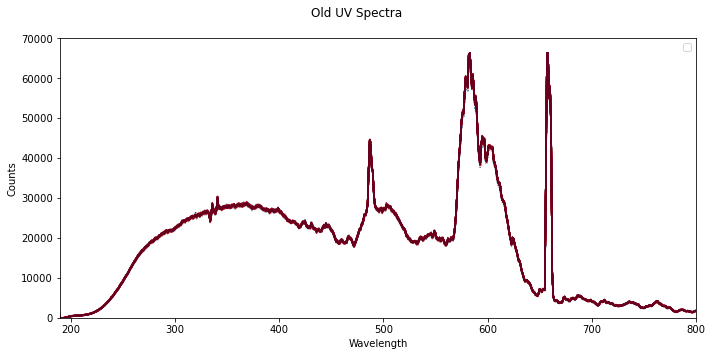

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a colormap that goes from red to blue
cmap = plt.cm.get_cmap('RdBu_r')

# Create a figure and set the size
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data using a loop to set the color of each line
for i, col in enumerate(df_raw_vis.columns):
    color = cmap(i / (len(df_raw_vis.columns) - 1))  # Calculate the color based on the current line
    df_raw_vis[col].plot(ax=ax, color=color, label=col)

# Set the x and y limits, and the axis labels
ax.set_xlim(190, 800)
ax.set_ylim(0, 70000)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Counts')

# Add a title and legend
fig.suptitle('Old UV Spectra')
ax.legend("")

# Show the plot
plt.tight_layout()
fig.set_facecolor('w')

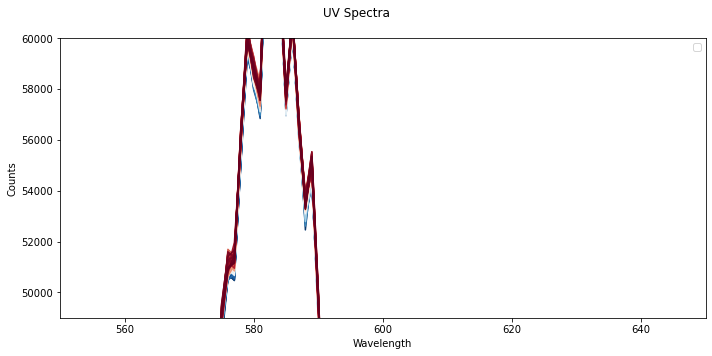

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a colormap that goes from red to blue
cmap = plt.cm.get_cmap('RdBu_r')

# Create a figure and set the size
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data using a loop to set the color of each line
for i, col in enumerate(df_raw_vis.columns):
    color = cmap(i / (len(df_raw_vis.columns) - 1))  # Calculate the color based on the current line
    df_raw_vis[col].plot(ax=ax, color=color, label=col)

# Set the x and y limits, and the axis labels
ax.set_xlim(550, 650)
ax.set_ylim(49000, 60000)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Counts')

# Add a title and legend
fig.suptitle('UV Spectra')
ax.legend("")

# Show the plot
plt.tight_layout()
fig.set_facecolor('w')

In [49]:
from sklearn.linear_model import LinearRegression

minets = dfd['minets']

acdom250 = dfd['acdom250']
acdom350 = dfd['acdom350']
acdom412 = dfd['acdom412']
acdom500 = dfd['acdom500']
acdom550 = dfd['acdom550']
acdom600 = dfd['acdom600']
acdom700 = dfd['acdom700']

minets_s = minets[60:180]
acdom250_s = acdom250[60:180]
acdom350_s = acdom350[60:180]
acdom412_s = acdom412[60:180]
acdom500_s = acdom500[60:180]
acdom550_s = acdom550[60:180]
acdom600_s = acdom600[60:180]
acdom700_s = acdom700[60:180]

# reshape the minets and acdom250 Series to 2D arrays
X = minets_s.values.reshape(-1, 1)
y = acdom250_s.values.reshape(-1, 1)
# fit a linear regression model to the data
reg = LinearRegression().fit(X, y)
# get the slope of the regression line
change_in_acdom250_over_minets = reg.coef_[0][0]
print(change_in_acdom250_over_minets)
ch_250_10 = round(change_in_acdom250_over_minets*10 , 2) 

# reshape the minets and acdom350 Series to 2D arrays
X = minets_s.values.reshape(-1, 1)
y = acdom350_s.values.reshape(-1, 1)
# fit a linear regression model to the data
reg = LinearRegression().fit(X, y)
# get the slope of the regression line
change_in_acdom350_over_minets = reg.coef_[0][0]
print(change_in_acdom350_over_minets)
ch_350_10 = round(change_in_acdom350_over_minets*10 , 2) 

# reshape the minets and acdom412 Series to 2D arrays
X = minets_s.values.reshape(-1, 1)
y = acdom412_s.values.reshape(-1, 1)
# fit a linear regression model to the data
reg = LinearRegression().fit(X, y)
# get the slope of the regression line
change_in_acdom412_over_minets = reg.coef_[0][0]
print(change_in_acdom412_over_minets)
ch_412_10 = round(change_in_acdom412_over_minets*10 , 2) 

# reshape the minets and acdom500 Series to 2D arrays
X = minets_s.values.reshape(-1, 1)
y = acdom500_s.values.reshape(-1, 1)
# fit a linear regression model to the data
reg = LinearRegression().fit(X, y)
# get the slope of the regression line
change_in_acdom500_over_minets = reg.coef_[0][0]
print(change_in_acdom500_over_minets)
ch_500_10 = round(change_in_acdom500_over_minets*10 , 2) 

# reshape the minets and acdom550 Series to 2D arrays
X = minets_s.values.reshape(-1, 1)
y = acdom550_s.values.reshape(-1, 1)
# fit a linear regression model to the data
reg = LinearRegression().fit(X, y)
# get the slope of the regression line
change_in_acdom550_over_minets = reg.coef_[0][0]
print(change_in_acdom550_over_minets)
ch_550_10 = round(change_in_acdom550_over_minets*10 , 2) 

# reshape the minets and acdom600 Series to 2D arrays
X = minets_s.values.reshape(-1, 1)
y = acdom600_s.values.reshape(-1, 1)
# fit a linear regression model to the data
reg = LinearRegression().fit(X, y)
# get the slope of the regression line
change_in_acdom600_over_minets = reg.coef_[0][0]
print(change_in_acdom600_over_minets)
ch_600_10 = round(change_in_acdom600_over_minets*10 , 2) 

# reshape the minets and acdom700 Series to 2D arrays
X = minets_s.values.reshape(-1, 1)
y = acdom700_s.values.reshape(-1, 1)
# fit a linear regression model to the data
reg = LinearRegression().fit(X, y)
# get the slope of the regression line
change_in_acdom700_over_minets = reg.coef_[0][0]
print(change_in_acdom700_over_minets)
ch_700_10 = round(change_in_acdom700_over_minets*10, 2) 

print('')

print(ch_250_10)
print(ch_350_10)
print(ch_412_10)
print(ch_500_10)
print(ch_550_10)
print(ch_600_10)
print(ch_700_10)



-0.041759386704063484
0.8852880263460011
-0.25264020936064535
1.5675795765426657
2.0489322822570855
3.551477354074772
0.5289278682461359

-0.42
8.85
-2.53
15.68
20.49
35.51
5.29


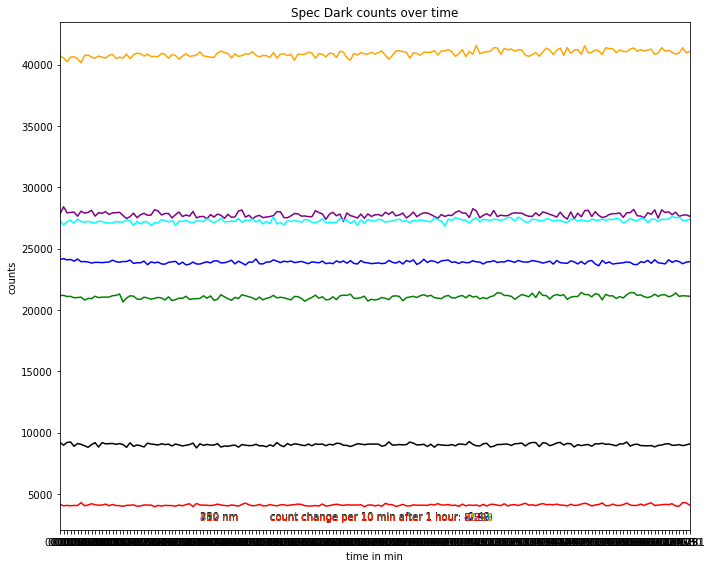

In [50]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 

minets = dfd['minets']

acdom250 = dfd['acdom250']
acdom350 = dfd['acdom350']
acdom412 = dfd['acdom412']
acdom500 = dfd['acdom500']
acdom550 = dfd['acdom550']
acdom600 = dfd['acdom600']
acdom700 = dfd['acdom700']

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(minets, acdom250, c='black')
ax.plot(minets, acdom350, c='purple')
ax.plot(minets, acdom412, c='blue')
ax.plot(minets, acdom500, c='cyan')
ax.plot(minets, acdom550, c='green')
ax.plot(minets, acdom600, c='orange')
ax.plot(minets, acdom700, c='red')

ax.set_xlim(0,180)
#ax.set_ylim(15000,55000)

ax.text(40,2900,"250 nm", fontsize=10, ha='left', c="black")
ax.text(40,2890,"350 nm", fontsize=10, ha='left', c="purple")
ax.text(40,2880,"412 nm", fontsize=10, ha='left', c="blue")
ax.text(40,2870,"500 nm", fontsize=10, ha='left', c="cyan")
ax.text(40,2860,"550 nm", fontsize=10, ha='left', c="green")
ax.text(40,2850,"600 nm", fontsize=10, ha='left', c="orange")
ax.text(40,2840,"700 nm", fontsize=10, ha='left', c="red")

ax.text(60,2900,f"count change per 10 min after 1 hour: {ch_250_10}", fontsize=10, ha='left', c="black")
ax.text(60,2890,f"count change per 10 min after 1 hour: {ch_350_10}", fontsize=10, ha='left', c="purple")
ax.text(60,2880,f"count change per 10 min after 1 hour: {ch_412_10}", fontsize=10, ha='left', c="blue")
ax.text(60,2870,f"count change per 10 min after 1 hour: {ch_500_10}", fontsize=10, ha='left', c="cyan")
ax.text(60,2860,f"count change per 10 min after 1 hour: {ch_550_10}", fontsize=10, ha='left', c="green")
ax.text(60,2850,f"count change per 10 min after 1 hour: {ch_600_10}", fontsize=10, ha='left', c="orange")
ax.text(60,2840,f"count change per 10 min after 1 hour: {ch_700_10}", fontsize=10, ha='left', c="red")


ax.set_xlabel("time in min")
ax.set_ylabel("counts")
ax.set_title("Spec Dark counts over time")

plt.tight_layout()
fig.set_facecolor('w')


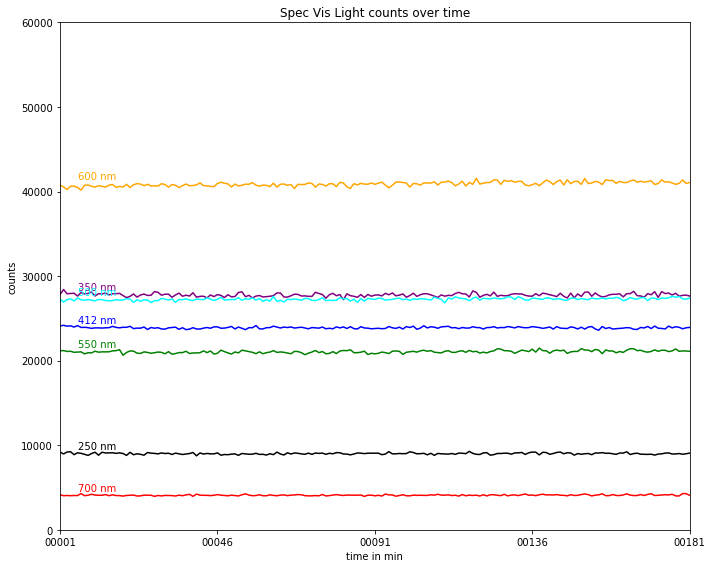

In [51]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 

minets = dfd['minets']

acdom250 = dfd['acdom250']
acdom350 = dfd['acdom350']
acdom412 = dfd['acdom412']
acdom500 = dfd['acdom500']
acdom550 = dfd['acdom550']
acdom600 = dfd['acdom600']
acdom700 = dfd['acdom700']

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(minets, acdom250, c='black')
ax.plot(minets, acdom350, c='purple')
ax.plot(minets, acdom412, c='blue')
ax.plot(minets, acdom500, c='cyan')
ax.plot(minets, acdom550, c='green')
ax.plot(minets, acdom600, c='orange')
ax.plot(minets, acdom700, c='red')

ax.set_xlim(0,180)
ax.set_ylim(0,60000)

ax.text(5,acdom250.mean()+500,"250 nm", fontsize=10, ha='left', c="black")
ax.text(5,acdom350.mean()+500,"350 nm", fontsize=10, ha='left', c="purple")
ax.text(5,acdom412.mean()+500,"412 nm", fontsize=10, ha='left', c="blue")
ax.text(5,acdom500.mean()+500,"500 nm", fontsize=10, ha='left', c="cyan")
ax.text(5,acdom550.mean()+500,"550 nm", fontsize=10, ha='left', c="green")
ax.text(5,acdom600.mean()+500,"600 nm", fontsize=10, ha='left', c="orange")
ax.text(5,acdom700.mean()+500,"700 nm", fontsize=10, ha='left', c="red")

minets_selected = np.take(minets, [0, 45, 90, 135, 180])
ax.set_xticks(minets_selected)

ax.set_xlabel("time in min")
ax.set_ylabel("counts")
ax.set_title("Spec Vis Light counts over time")

plt.tight_layout()
fig.set_facecolor('w')

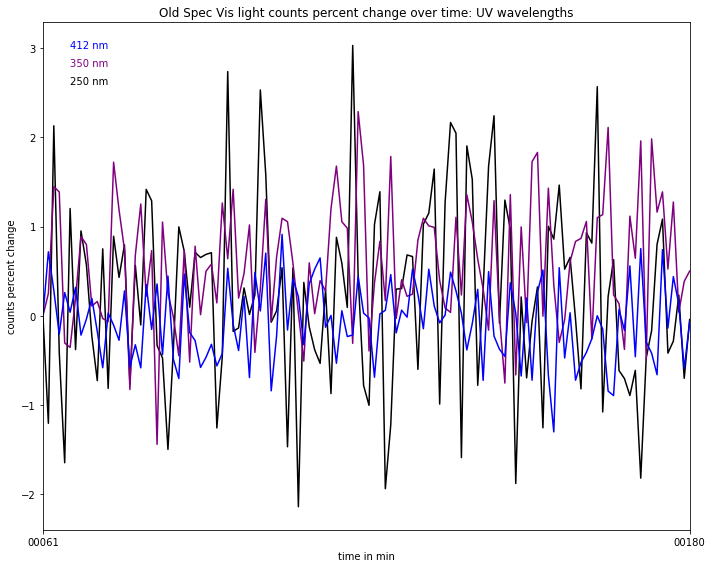

In [55]:
acdom250_percent_change = ((acdom250_s - acdom250_s[0])/abs(acdom250_s[0]))*100
acdom350_percent_change = ((acdom350_s - acdom350_s[0])/abs(acdom350_s[0]))*100
acdom412_percent_change = ((acdom412_s - acdom412_s[0])/abs(acdom412_s[0]))*100
acdom500_percent_change = ((acdom500_s - acdom500_s[0])/abs(acdom500_s[0]))*100
acdom550_percent_change = ((acdom550_s - acdom550_s[0])/abs(acdom550_s[0]))*100
acdom600_percent_change = ((acdom600_s - acdom600_s[0])/abs(acdom600_s[0]))*100
acdom700_percent_change = ((acdom700_s - acdom700_s[0])/abs(acdom700_s[0]))*100

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(minets_s, acdom250_percent_change, c='black')
ax.plot(minets_s, acdom350_percent_change, c='purple')
ax.plot(minets_s, acdom412_percent_change, c='blue')
#ax.plot(minets_s, acdom500_percent_change, c='cyan')
#ax.plot(minets_s, acdom550_percent_change, c='green')
#ax.plot(minets_s, acdom600_percent_change, c='orange')
#ax.plot(minets_s, acdom700_percent_change, c='red')

ax.set_xlim(0,len(minets_s)-1)
#ax.set_ylim(15000,55000)

ax.text(5,2.6,"250 nm", fontsize=10, ha='left', c="black")
ax.text(5,2.8,"350 nm", fontsize=10, ha='left', c="purple")
ax.text(5,3,"412 nm", fontsize=10, ha='left', c="blue")
#ax.text(5,4.1,"500 nm", fontsize=10, ha='left', c="cyan")
#ax.text(5,3.9,"550 nm", fontsize=10, ha='left', c="green")
#ax.text(5,3.7,"600 nm", fontsize=10, ha='left', c="orange")
#ax.text(5,3.5,"700 nm", fontsize=10, ha='left', c="red")

minets_selected = np.take(minets_s, [0, len(minets_s)-1])
ax.set_xticks(minets_selected)

ax.set_xlabel("time in min")
ax.set_ylabel("counts percent change")
ax.set_title("Old UV light counts percent change over time: UV wavelengths")

plt.tight_layout()
fig.set_facecolor('w')

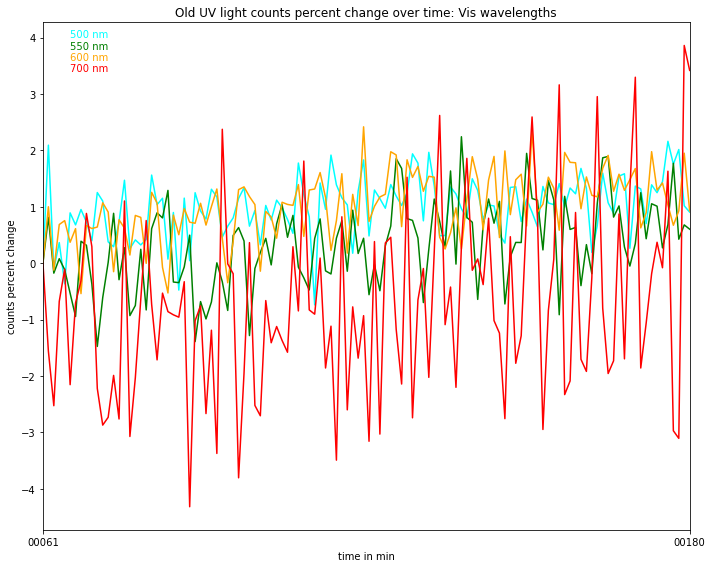

In [57]:
fig, ax = plt.subplots(figsize=(10,8))
#ax.plot(minets_s, acdom250_percent_change, c='black')
#ax.plot(minets_s, acdom350_percent_change, c='purple')
#ax.plot(minets_s, acdom412_percent_change, c='blue')
ax.plot(minets_s, acdom500_percent_change, c='cyan')
ax.plot(minets_s, acdom550_percent_change, c='green')
ax.plot(minets_s, acdom600_percent_change, c='orange')
ax.plot(minets_s, acdom700_percent_change, c='red')

ax.set_xlim(0,len(minets_s)-1)
#ax.set_ylim(15000,55000)

#ax.text(65,-1.1,"250 nm", fontsize=10, ha='left', c="black")
#ax.text(65,-1.2,"350 nm", fontsize=10, ha='left', c="purple")
#ax.text(5,4.3,"412 nm", fontsize=10, ha='left', c="blue")
ax.text(5,4.0,"500 nm", fontsize=10, ha='left', c="cyan")
ax.text(5,3.8,"550 nm", fontsize=10, ha='left', c="green")
ax.text(5,3.6,"600 nm", fontsize=10, ha='left', c="orange")
ax.text(5,3.4,"700 nm", fontsize=10, ha='left', c="red")

minets_selected = np.take(minets_s, [0, len(minets_s)-1])
ax.set_xticks(minets_selected)

ax.set_xlabel("time in min")
ax.set_ylabel("counts percent change")
ax.set_title("Old UV light counts percent change over time: Vis wavelengths")

plt.tight_layout()
fig.set_facecolor('w')